# Are Americans Financially Literate?

_Here, I will assess the financial literacy levels amongst people who live in the U.S._

In [3]:
import pandas as pd

I obtained a csv file of entry points of >29,000 surveys.  I cleaned it up, processed the data through a pipeline written in Python.  Then, I created a new metric, called "financialliteracyscore" which assesses the 'financial-literacy-ness' so to speak of a person.  I created this metric based on three foundational concepts that encompass financial literacy: the knowledge of compound interest, the practice of planning for the future, and basic money management, including budgeting and owning a savings account. All of this data was in the csv file I found.  I saved the clean and revised dataframe in a csv, called ```correct_processed_data.csv```.

In [9]:
file_one = pd.read_csv("./correct_processed_data.csv")


In [10]:
file_one


,NFCSID,State,CensusDivision,CensusRegion,Gender,AgeGroup,Gender/AgeNet,Ethnicity,HighestLevelEducation,MaritalStatus,...,FinancialTestQ1,FinancialTestQ2,FinancialTestQ3,FinancialTestQ4,FinancialTestQ5,FinancialTestQ6,NationalWeightByAgeGenderEthnicityEducationCensusDivision,DivisionalWeightByAgeGenderEthnicityEducationState,StateWeightByAgeGenderEthnicityEducation,financialliteracyscore
0,2015010001,Arizona,Mountain,West,Male,65+,6,White,"College, no degree",Divorced,...,3,3,98,98,1,98,0.536725,2.758128,1.287577,25.925926
1,2015010002,Ohio,East North Central,Midwest,Female,55-64,11,White,"College, no degree",Widowed/Widower,...,1,3,98,2,1,98,1.663579,1.587114,1.022437,29.629630
2,2015010003,New York,Middle Atlantic,Northeast,Female,25-34,8,White,Bachelor's,Married,...,1,98,98,98,1,98,0.708960,0.823015,0.823240,22.222222
3,2015010004,Florida,South Atlantic,South,Female,35-44,9,Non-White,GED or alternative,Divorced,...,3,98,98,98,1,98,2.031946,2.983356,1.020086,14.814815
4,2015010005,New Jersey,Middle Atlantic,Northeast,Male,55-64,5,White,HS diploma,Single,...,1,98,98,98,1,2,2.521054,0.980330,1.145100,29.629630
5,2015010006,Missouri,West North Central,Midwest,Male,65+,6,White,Post Graduate,Married,...,1,3,2,2,1,2,0.395068,1.682096,0.788287,59.259259
6,2015010007,Florida,South Atlantic,South,Male,35-44,3,Non-White,Bachelor's,Married,...,98,98,98,98,98,2,1.570852,2.298935,0.776923,14.814815
7,2015010008,Arizona,Mountain,West,Female,35-44,9,Non-White,Did not complete HS,Single,...,98,1,98,98,98,98,0.308107,2.172517,1.072801,14.814815
8,2015010009,South Carolina,South Atlantic,South,Female,65+,12,Non-White,Post Graduate,Divorced,...,2,3,4,2,1,98,0.960049,0.528338,0.772425,18.518519
9,2015010010,New York,Middle Atlantic,Northeast,Male,18-24,1,Non-White,Bachelor's,Single,...,98,98,3,98,98,2,1.118281,0.756921,0.742193,11.111111


The file is pretty big, with a lot of information.  The task is to pick out some of the more interesting attributes in this dataset.

In [18]:
df = pd.DataFrame(file_one)

In [13]:
stats = df['financialliteracyscore'].describe()


In [15]:
stats


count    27564.000000
mean        43.777176
std         18.175437
min          0.000000
25%         29.629630
50%         44.444444
75%         59.259259
max         92.592593
Name: financialliteracyscore, dtype: float64

Already, the stats looks alarming.  According this, 75% of surveyees score less than a 60% on the assessment that measures their financial-literacy-ness.

In [33]:
df['financialliteracyscore'].quantile(q=0.91)

70.37037037037038

The above statistic suggests that only about 9% of the surveyees passed the test.

____________________________________________________________________

## Most Americans are worried about retirement

In [36]:
data = df.loc[df['DegreeOfWorryAboutRetirement'] <= 7]


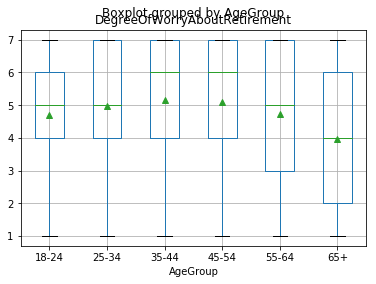

In [37]:
data.boxplot(column='DegreeOfWorryAboutRetirement', by="AgeGroup", showmeans=True)


_______________________________________________________________________


## Most Americans own a savings account.

In [ ]:
data = df.loc[df['SavingsAccount?'] <= 2]

Code like right above is just acquiring the values from the dataframe that only have 1 (i.e. 'yes') or 2 (i.e. 'no').  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0df575d5c0>]],
      dtype=object)

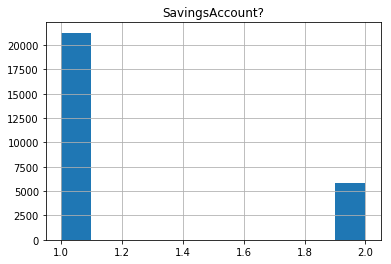

In [41]:
data.hist(column = 'SavingsAccount?')

______________________________________________________________________

In [ ]:
data = df.loc[df['OwnHome?'] <= 2]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0df1d10b38>]],
      dtype=object)

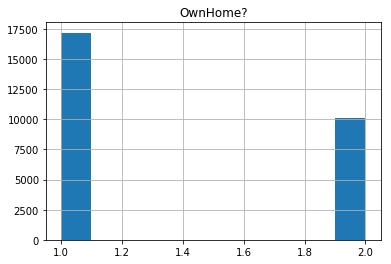

In [44]:
data.hist(column = 'OwnHome?')

In [45]:
data['OwnHome?'].describe()

count    27309.000000
mean         1.370427
std          0.482928
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: OwnHome?, dtype: float64

In [51]:
own_home= data.loc[data['OwnHome?'] == 1]['OwnHome?'].count()

In [52]:
rent_home = data.loc[data['OwnHome?'] == 2]['OwnHome?'].count()

In [55]:
stats = own_home/(float(rent_home)+own_home)*100

In [56]:
stats


62.9572668351093

Noteworthy to point out that 63% of surveyees own a home. It is worth investigating: is there a difference between the financial literacy score between those who own a home and those who do not? Let's find out...

In [58]:
df_owners = data.loc[data['OwnHome?'] == 1]

In [59]:
df_renters = data.loc[data['OwnHome?']==2]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0df1bf4358>]],
      dtype=object)

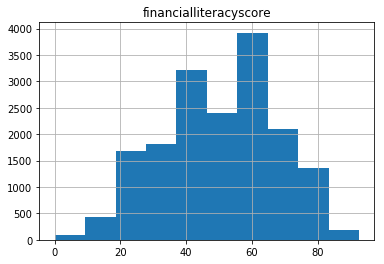

In [60]:
df_owners.hist(column = 'financialliteracyscore')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0df1bb9358>]],
      dtype=object)

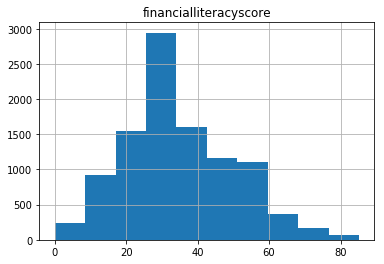

In [61]:
df_renters.hist(column = 'financialliteracyscore')

Oh wow. That looks quite drastic.  The financial literacy score of those who rent have an average that is centered more to the left than the average of the scores of homeowners.

In [64]:
df_owners['financialliteracyscore'].describe()

count    17193.000000
mean        49.411151
std         17.396916
min          0.000000
25%         37.037037
50%         51.851852
75%         62.962963
max         92.592593
Name: financialliteracyscore, dtype: float64

In [65]:
df_renters['financialliteracyscore'].describe()

count    10116.000000
mean        34.586207
std         15.365730
min          0.000000
25%         22.222222
50%         33.333333
75%         44.444444
max         85.185185
Name: financialliteracyscore, dtype: float64